In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import joblib

In [2]:
nltk.download("stopwords")
STOPWORDS = set(stopwords.words("english"))
# We use this code to remove common, unimportant words from text before doing NLP and Machine Learning.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_excel("emotion_intensity_detection.xlsx")
df.head()


,ID,Tweet,Emotion,Intensity Score,Age,Gender,Platform,User Location
0,1001,Watching the rain and feeling so peaceful.,Sadness,0.05,29,Female,Twitter,USA
1,1002,The service delay is absolutely ridiculous! I'...,Anger,0.92,45,Male,Reddit,UK
2,1003,Got the news! I am jumping for joy!,Joy,0.98,21,Female,Twitter,Canada
3,1004,"Just a mild inconvenience, not a big deal.",Anger,0.21,33,Male,Facebook,USA
4,1005,I'm really apprehensive about tomorrow's prese...,Fear,0.65,50,Female,Twitter,Germany


In [4]:
df.shape

(100, 8)

In [5]:
df.columns

Index(['ID', 'Tweet', 'Emotion', 'Intensity Score', 'Age', 'Gender',
       'Platform', 'User Location'],
      dtype='object')

In [6]:
import pandas as pd

column_names = [
    'ID',
    'Tweet',
    'Emotion',
    'Intensity Score',
    'Age',
    'Gender',
    'Platform',
    'User Location'
]

df = pd.read_excel(
    "emotion_intensity_detection.xlsx",
    header=None,
    names=column_names
)


In [7]:
df.head()

,ID,Tweet,Emotion,Intensity Score,Age,Gender,Platform,User Location
0,ID,Tweet,Emotion,Intensity Score,Age,Gender,Platform,User Location
1,1001,Watching the rain and feeling so peaceful.,Sadness,0.05,29,Female,Twitter,USA
2,1002,The service delay is absolutely ridiculous! I'...,Anger,0.92,45,Male,Reddit,UK
3,1003,Got the news! I am jumping for joy!,Joy,0.98,21,Female,Twitter,Canada
4,1004,"Just a mild inconvenience, not a big deal.",Anger,0.21,33,Male,Facebook,USA


In [9]:
df.isnull().sum()
# check missing (null) values in each column of a dataset.
# It is a very important step in Exploratory Data Analysis (EDA).

ID                 0
Tweet              0
Emotion            0
Intensity Score    0
Age                0
Gender             0
Platform           0
User Location      0
dtype: int64

In [10]:
df['Emotion'].value_counts()


Emotion
Joy                 30
Sadness             21
Anger               21
Fear                19
Neutral/Calmness     9
Emotion              1
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()


Gender
Female        51
Male          48
Gender         1
Non-binary     1
Name: count, dtype: int64

In [12]:
df['Platform'].value_counts()


Platform
Twitter      41
Reddit       25
Facebook     24
Instagram    10
Platform      1
Name: count, dtype: int64

In [13]:
df.value_counts().sum()
# count the total number of records based on unique value combinations in a DataFrame and verify the dataset size.

101

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               101 non-null    object
 1   Tweet            101 non-null    object
 2   Emotion          101 non-null    object
 3   Intensity Score  101 non-null    object
 4   Age              101 non-null    object
 5   Gender           101 non-null    object
 6   Platform         101 non-null    object
 7   User Location    101 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [15]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['ID', 'Tweet', 'Emotion', 'Intensity Score', 'Age', 'Gender',
       'Platform', 'User Location'],
      dtype='object')

In [17]:
df['Target'] = df['Emotion'].replace({
    0: "negative",
    2: "neutral",
    4: "positive"
})
# convert numeric emotion labels into meaningful text labels.


In [18]:
df = df.drop([ 'Intensity Score','Target'], axis=1)
# removes unwanted columns from the dataset.

In [19]:
df.head()

,ID,Tweet,Emotion,Age,Gender,Platform,User Location
0,ID,Tweet,Emotion,Age,Gender,Platform,User Location
1,1001,Watching the rain and feeling so peaceful.,Sadness,29,Female,Twitter,USA
2,1002,The service delay is absolutely ridiculous! I'...,Anger,45,Male,Reddit,UK
3,1003,Got the news! I am jumping for joy!,Joy,21,Female,Twitter,Canada
4,1004,"Just a mild inconvenience, not a big deal.",Anger,33,Male,Facebook,USA


In [21]:
stop_words = stopwords.words('english')
def clean_text(text):
    text = str(text).lower()
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text
df["Tweejt"] = df["Tweet"].apply(clean_text)
# clean tweet text before applying NLP and Machine Learning, especially for emotion / intensity detection.

In [22]:
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             101 non-null    object
 1   Tweet          101 non-null    object
 2   Emotion        101 non-null    object
 3   Age            101 non-null    object
 4   Gender         101 non-null    object
 5   Platform       101 non-null    object
 6   User Location  101 non-null    object
 7   Tweejt         101 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB
None
         ID  Tweet Emotion  Age  Gender Platform User Location Tweejt
count   101    101     101  101     101      101           101    101
unique  101    101       6   39       4        5             7    101
top      ID  Tweet     Joy   30  Female  Twitter           USA  tweet
freq      1      1      30    4      51       41            25      1
ID               0
Tweet            0
Emotion          0
Age           

In [23]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['ID', 'Tweet', 'Emotion', 'Age', 'Gender', 'Platform', 'User Location',
       'Tweejt'],
      dtype='object')


In [24]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# convert the Age column to numeric type, which is required for analysis and modeling.

In [25]:
df = df.dropna(subset=['Age'])
# remove rows where the Age column has missing values (NaN).

In [26]:
df['Emotion'] = df['Emotion'].astype(str)
# converts the Emotion column to string type.


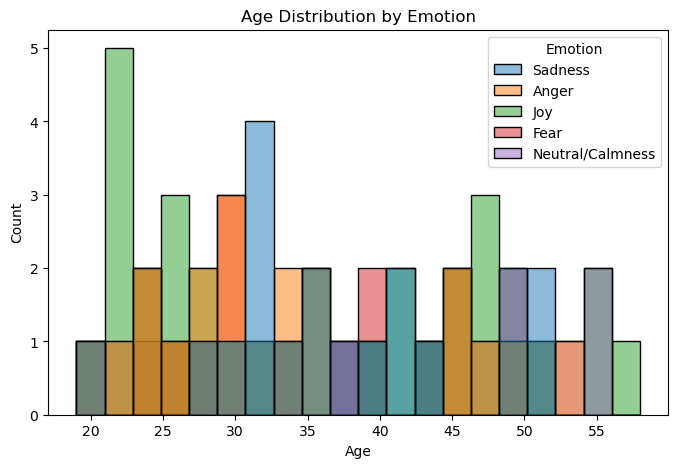

In [27]:


plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Emotion", bins=20)
plt.title("Age Distribution by Emotion")
plt.show()
# distribution of Age across different emotions using a histogram.

In [28]:
X = df['Tweet']           
y = df['Emotion'] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# split the dataset into training and testing sets for machine learning.


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorizer = CountVectorizer()

# Fit on training data and transform
X_train_vector = vectorizer.fit_transform(X_train)

# Transform test data
X_test_vector = vectorizer.transform(X_test)
# convert text data into numerical features that a machine learning model can understand.

In [32]:
model = MultinomialNB()
model.fit(X_train_vector, y_train)
# train a machine learning model for text-based classification.

MultinomialNB()

In [33]:
predictions = model.predict(X_test_vector)

In [34]:
print("Model Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Model Accuracy: 0.25

Classification Report:
                   precision    recall  f1-score   support

           Anger       0.20      0.50      0.29         2
            Fear       0.33      0.17      0.22         6
             Joy       0.25      0.33      0.29         6
Neutral/Calmness       0.00      0.00      0.00         2
         Sadness       0.33      0.25      0.29         4

        accuracy                           0.25        20
       macro avg       0.22      0.25      0.22        20
    weighted avg       0.26      0.25      0.24        20



In [35]:

while True:
    text = input("Enter a tweet (type 'exit' to quit): ")
    if text.lower() == "exit":
        break
    vec = vectorizer.transform([clean_text(text)])
    print("Predicted Emotion:", model.predict(vec)[0])
    # interactively predict the emotion of new tweets using the trained model.


In [36]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [37]:
import joblib

# Save vectorizer
joblib.dump(
    vectorizer,
    r'C:\Users\Admin\OneDrive - Higher Education Commission\Desktop\ml 100\vectorizer.pkl'
)

# Save model
joblib.dump(
    model,
    r'C:\Users\Admin\OneDrive - Higher Education Commission\Desktop\ml 100\model.pkl'
)
# save the trained model and vectorizer to disk so you can reuse them later without retraining.

['C:\\Users\\Admin\\OneDrive - Higher Education Commission\\Desktop\\ml 100\\model.pkl']

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(predictions,y_test)
# creates a confusion matrix to see how well the model predicted each emotion.

In [40]:
print(cm)

[[1 1 1 1 1]
 [1 1 1 0 0]
 [0 3 2 1 2]
 [0 1 0 0 0]
 [0 0 2 0 1]]


In [41]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# code divides the dataset into training and testing sets to train the model and evaluate its performance on unseen data.

In [ ]:
pip install gradio


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install flask


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

clf = pickle.load(open("emotion_classifier.pkl", "rb"))
reg = pickle.load(open("intensity_regressor.pkl", "rb"))
tfidf = pickle.load(open("tfidf.pkl", "rb"))
le = pickle.load(open("label_encoder.pkl", "rb"))

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    text = data["text"]

    vector = tfidf.transform([text])
    emo = clf.predict(vector)[0]
    intensity = reg.predict(vector)[0]

    return jsonify({
        "emotion": le.inverse_transform([emo])[0],
        "intensity_score": float(intensity)
    })

if __name__ == "__main__":
    app.run(debug=True)
    
    # web API to predict emotion and intensity of a tweet using your trained models.


 * Serving Flask app '__main__'
 * Debug mode: on


c:\New folder\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\New folder\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\New folder\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.0 when using version 1.4.2. This might lead to breaking code or invalid results.

SystemExit: 1

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
pip install fastapi uvicorn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle

app = FastAPI()

clf = pickle.load(open("emotion_classifier.pkl", "rb"))
reg = pickle.load(open("intensity_regressor.pkl", "rb"))
tfidf = pickle.load(open("tfidf.pkl", "rb"))
le = pickle.load(open("label_encoder.pkl", "rb"))

class TextData(BaseModel):
    text: str

@app.post("/predict")
def predict(data: TextData):
    vector = tfidf.transform([data.text])
    emo = clf.predict(vector)[0]
    intensity = reg.predict(vector)[0]

    return {
        "emotion": le.inverse_transform([emo])[0],
        "intensity_score": float(intensity)
    }
# web API using FastAPI to predict emotion and intensity from a tweet using trained models.

In [44]:
pip install streamlit


   ---------------------------------------- 0.0/53.0 kB ? eta -:--:--
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:

ERROR: Exception:
Traceback (most recent call last):
  File "c:\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\New folder\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\New folder\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "c:\New folder\Lib\socket.py", line 708, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\New folder\Lib\ssl.py", line 125


   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 41.0/53.0 kB 1.9 MB

In [45]:
import streamlit as st
import pickle

clf = pickle.load(open("emotion_classifier.pkl", "rb"))
reg = pickle.load(open("intensity_regressor.pkl", "rb"))
tfidf = pickle.load(open("tfidf.pkl", "rb"))
le = pickle.load(open("label_encoder.pkl", "rb"))

st.title("Emotion Intensity Detector")

text = st.text_area("Enter text here:")

if st.button("Predict"):
    vector = tfidf.transform([text])
    emo = clf.predict(vector)[0]
    intensity = reg.predict(vector)[0]

    st.write("### Emotion:", le.inverse_transform([emo])[0])
    st.write("### Intensity Score:", float(intensity))
# web app interface for real-time emotion and intensity detection using trained ML models.

2025-12-15 16:23:57.849 
  command:

    streamlit run C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [46]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [47]:
# Text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize
vectorizer = CountVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_vector, y_train)
# trains a Logistic Regression model for text-based emotion classification

LogisticRegression(max_iter=200)

In [49]:
import joblib

joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
# code saves the trained Logistic Regression model and vectorizer to disk for future use or deployment.

['vectorizer.pkl']

In [50]:
log_reg = joblib.load("log_reg_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")
# loads the saved Logistic Regression model and CountVectorizer to make predictions on new text data.

In [51]:
import streamlit as st
import joblib

# Load model
model = joblib.load("log_reg_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

st.title("Emotion Prediction from Tweet")

tweet = st.text_input("Enter a tweet:")

if st.button("Predict"):
    vec = vectorizer.transform([tweet])
    prediction = model.predict(vec)[0]
    st.write("Predicted Emotion:", prediction)
# web app interface to predict the emotion of a tweet using a saved Logistic Regression model.

In [52]:
import gradio as gr
import joblib

model = joblib.load("log_reg_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

def predict_emotion(tweet):
    vec = vectorizer.transform([tweet])
    return model.predict(vec)[0]

iface = gr.Interface(fn=predict_emotion, inputs="text", outputs="text")
iface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [53]:
# -----------------------------
# Streamlit Emotion Prediction App
# -----------------------------

import streamlit as st
import pandas as pd
import joblib
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# -----------------------------
# 1. Load trained model & vectorizer
# -----------------------------
# Make sure these files exist in the same folder or give full path
model = joblib.load("log_reg_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# -----------------------------
# 2. Stopwords for text cleaning
# -----------------------------
stop_words = stopwords.words('english')

def clean_text(text):
    """Lowercase + remove stopwords"""
    text = str(text).lower()
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# -----------------------------
# 3. Streamlit interface
# -----------------------------
st.title("Tweet Emotion Predictor")

st.write("Enter a tweet below and the model will predict the emotion:")

tweet_input = st.text_area("Enter Tweet:")

if st.button("Predict Emotion"):
    if tweet_input.strip() == "":
        st.warning("Please enter a tweet!")
    else:
        # Clean and vectorize input
        cleaned = clean_text(tweet_input)
        vec = vectorizer.transform([cleaned])
        
        # Predict
        prediction = model.predict(vec)[0]
        st.success(f"Predicted Emotion: {prediction}")


In [54]:
import gradio as gr
import joblib
from nltk.corpus import stopwords

# Load trained model & vectorizer
model = joblib.load("log_reg_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Stopwords
stop_words = stopwords.words('english')

# Text cleaning function (same as training)
def clean_text(text):
    text = str(text).lower()
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# Prediction function
def predict_emotion(tweet):
    cleaned = clean_text(tweet)
    vec = vectorizer.transform([cleaned])
    return model.predict(vec)[0]

# Gradio Interface
iface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=3, placeholder="Enter a tweet"),
    outputs="text",
    title="Tweet Emotion Predictor",
    description="Enter a tweet to predict its emotion"
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


In [55]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

# --------------------------
# 1. Load your dataset
# --------------------------
df = pd.read_excel("emotion_intensity_detection.xlsx")  # Replace with your file
# Example columns: ['Tweet', 'Emotion']

# --------------------------
# 2. Text Cleaning
# --------------------------
stop_words = stopwords.words('english')

def clean_text(text):
    text = str(text).lower()
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# --------------------------
# 3. Train-test split
# --------------------------
X = df['Cleaned_Tweet']
y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# 4. Vectorize text
# --------------------------
vectorizer = CountVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

# --------------------------
# 5. Train Decision Tree
# --------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vector, y_train)

# --------------------------
# 6. Make predictions
# --------------------------
y_pred = dt_model.predict(X_test_vector)

# --------------------------
# 7. Evaluate model
# --------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --------------------------
# 8. Optional: Save model
# --------------------------
import joblib
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


Accuracy: 0.25

Confusion Matrix:
 [[1 1 0 0 0]
 [5 1 0 0 0]
 [2 0 2 0 2]
 [1 0 0 1 0]
 [3 0 1 0 0]]

Classification Report:
                   precision    recall  f1-score   support

           Anger       0.08      0.50      0.14         2
            Fear       0.50      0.17      0.25         6
             Joy       0.67      0.33      0.44         6
Neutral/Calmness       1.00      0.50      0.67         2
         Sadness       0.00      0.00      0.00         4

        accuracy                           0.25        20
       macro avg       0.45      0.30      0.30        20
    weighted avg       0.46      0.25      0.29        20



['vectorizer.pkl']